# Colour - HDRI - Example - Global Tonemapping Operators

This notebook showcase currently implemented Global Tonemapping Operators.

> Note: The global tonemapping operators are showcased with their default values which are not necessarily adapted to the test image.

- [Simple](#Simple)
- [Normalise](#Normalise)
- [Gamma](#Gamma)
- [Logarithmic](#Logarithmic)
- [Exponential](#Exponential)
- [Logarithmic Mapping](#Logarithmic-Mapping)
- [Exponentiation Mapping](#Exponentiation-Mapping)
- [Schlick (1994)](#Schlick-%281994%29)
- [Tumblin (1999)](#Tumblin-%281999%29)
- [Reinhard (2004)](#Reinhard-%282004%29)
- [Filmic](#Filmic)

## Utilities

In [1]:
% matplotlib inline

from __future__ import division

import IPython.display
import IPython.html.widgets
import matplotlib.pyplot
import numpy as np
import os
import pylab
from collections import OrderedDict

import colour

from colour.plotting import *
from colour.utilities import (
    handle_numpy_errors,
    ignore_numpy_errors)

from colour_hdri.tonemapping.global_operators.operators import (
    tonemapping_operator_simple,
    tonemapping_operator_normalisation,
    tonemapping_operator_gamma,
    tonemapping_operator_logarithmic,
    tonemapping_operator_exponential,
    tonemapping_operator_logarithmic_mapping,
    tonemapping_operator_exponentiation_mapping,
    tonemapping_operator_Schlick1994,
    tonemapping_operator_Tumblin1999,
    tonemapping_operator_Reinhard2004,
    tonemapping_operator_filmic)

OECF = colour.RGB_COLOURSPACES['sRGB'].transfer_function

RESOURCES_DIRECTORY = os.path.join(os.getcwd(),
                                   '..',
                                   'resources',
                                   'colour-hdri-examples-dataset',
                                   'radiance')

def tonemapping_operator_image_plot(image,
                                    curve,
                                    log_scale=False,
                                    transfer_function=colour.RGB_COLOURSPACES['sRGB'].transfer_function,
                                    **kwargs):
    
    shape = image.shape
    limits = [0, 1, 0, 1]
    
    image = np.clip(transfer_function(image), 0, 1)
    pylab.imshow(image, aspect=shape[0] / shape[1], extent=limits, interpolation='nearest')

    pylab.plot(np.linspace(0, 1, len(curve)), curve, color='red')

    settings = {
        'figure_size': (8, 8),
        'x_label': 'Input Luminance',
        'y_label': 'Output Luminance',
        'x_ticker': True,
        'y_ticker': True,
        'grid': True,
        'x_tighten': True,
        'y_tighten': True,
        'limits': limits}
    settings.update(kwargs)

    if log_scale:
        settings.update({
            'x_label': '$log_2$ Input Luminance',
            'x_ticker_locator': matplotlib.ticker.AutoMinorLocator(0.5)})
        matplotlib.pyplot.gca().set_xscale('log', basex=2)
        matplotlib.pyplot.gca().xaxis.set_major_formatter(
            matplotlib.ticker.ScalarFormatter())

    canvas(**settings)
    decorate(**settings)
    boundaries(**settings)
    display(**settings)

/Users/kelsolaar/Documents/Development/Environments/colour-hdri/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Data

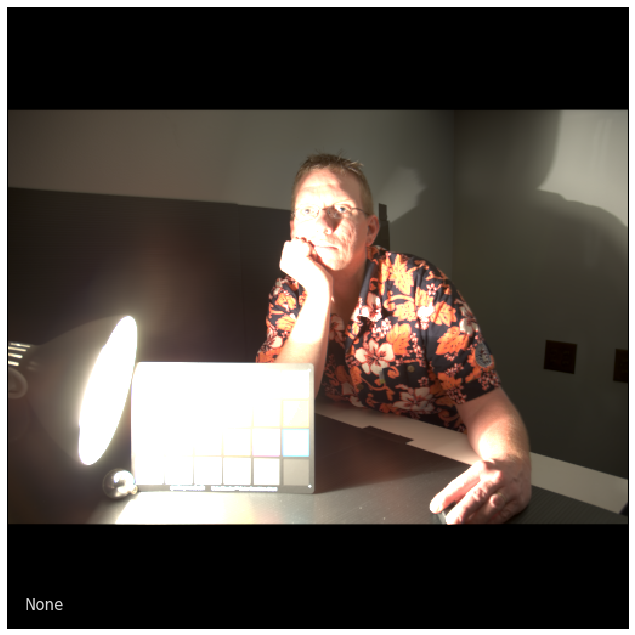

True

In [2]:
HDRI_IMAGE = colour.read_image(os.path.join(RESOURCES_DIRECTORY, 'HDRMark_small.hdr'))

SAMPLES = np.linspace(0, 1, 512)
D_SAMPLES = np.dstack((SAMPLES, SAMPLES, SAMPLES))

image_plot(OECF(HDRI_IMAGE))

## Simple

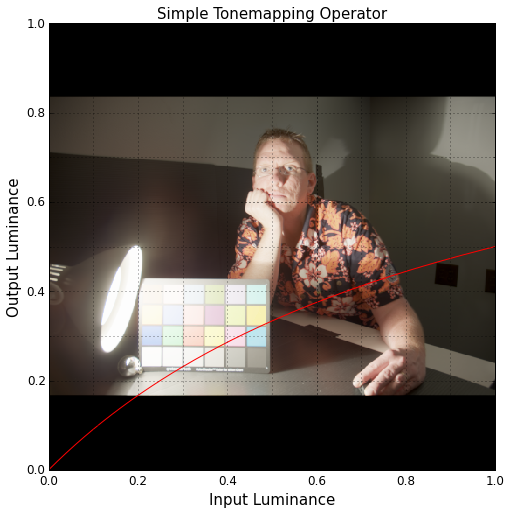

In [3]:
tonemapping_operator_image_plot(
    tonemapping_operator_simple(HDRI_IMAGE),
    tonemapping_operator_simple(SAMPLES),
    title='Simple Tonemapping Operator')

## Normalisation

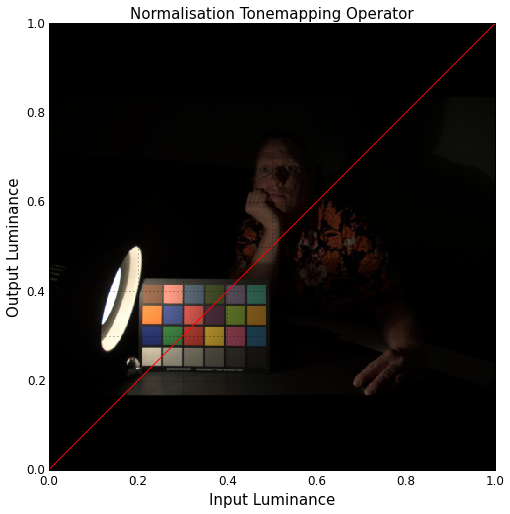

In [4]:
tonemapping_operator_image_plot(
    tonemapping_operator_normalisation(HDRI_IMAGE),
    np.squeeze(tonemapping_operator_normalisation(D_SAMPLES)[..., 0]),
    title='Normalisation Tonemapping Operator')

## Gamma

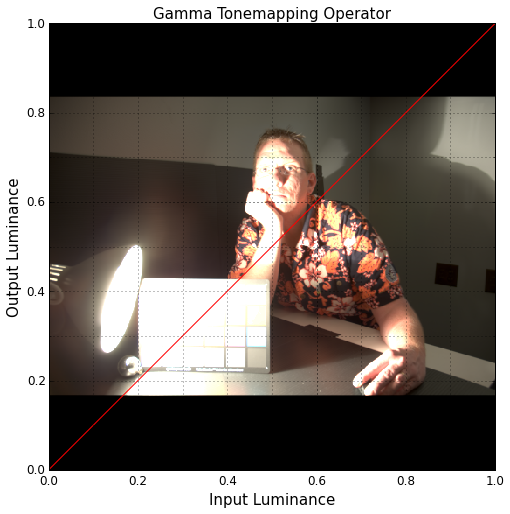

None

In [5]:
def tonemapping_operator_gamma_interactive(image, gamma=1, f_stop=0):
    tonemapping_operator_image_plot(
        tonemapping_operator_gamma(image, gamma, f_stop),
        tonemapping_operator_gamma(SAMPLES, gamma, f_stop),
        title='Gamma Tonemapping Operator')


IPython.display.display(
    IPython.html.widgets.interactive(
        tonemapping_operator_gamma_interactive,
        image=IPython.html.widgets.fixed(HDRI_IMAGE),
        gamma=(0.1, 3, 0.1),
        f_stop=(-10, 10, 0.1)))

## Logarithmic

/Users/kelsolaar/Documents/Development/Environments/colour-hdri/lib/python2.7/site-packages/colour_hdri/tonemapping/global_operators/operators.py:262: RuntimeWarning: invalid value encountered in true_divide
  RGB = RGB * L_d[..., np.newaxis] / L[..., np.newaxis]
/Users/kelsolaar/Documents/Development/Environments/colour-hdri/lib/python2.7/site-packages/colour/models/dataset/srgb.py:109: RuntimeWarning: invalid value encountered in less_equal
  return np.where(value <= 0.0031308,


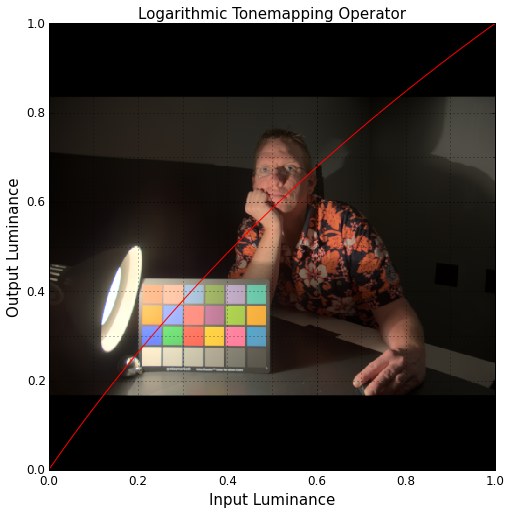

None

In [6]:
def tonemapping_operator_logarithmic_interactive(image, q=1, k=1):
    tonemapping_operator_image_plot(
        tonemapping_operator_logarithmic(image, q, k),
        np.squeeze(tonemapping_operator_logarithmic(D_SAMPLES, q, k)[..., 0]),
        title='Logarithmic Tonemapping Operator')


IPython.display.display(
    IPython.html.widgets.interactive(
        tonemapping_operator_logarithmic_interactive,
        image=IPython.html.widgets.fixed(HDRI_IMAGE),
        q=(1, 100, 0.1),
        k=(1, 100, 0.1)))

## Exponential

/Users/kelsolaar/Documents/Development/Environments/colour-hdri/lib/python2.7/site-packages/colour_hdri/tonemapping/global_operators/operators.py:315: RuntimeWarning: invalid value encountered in true_divide
  RGB = RGB * L_d[..., np.newaxis] / L[..., np.newaxis]


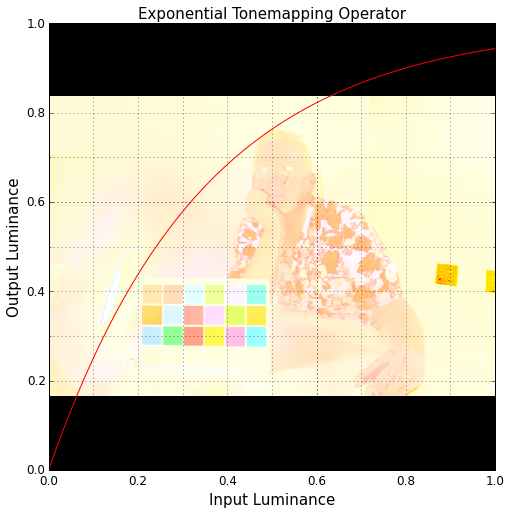

None

In [7]:
def tonemapping_operator_exponential_interactive(image, q=1, k=1):
    tonemapping_operator_image_plot(
        tonemapping_operator_exponential(image, q, k),
        np.squeeze(tonemapping_operator_exponential(D_SAMPLES, q, k)[..., 0]),
        title='Exponential Tonemapping Operator')


IPython.display.display(
    IPython.html.widgets.interactive(
        tonemapping_operator_exponential_interactive,
        image=IPython.html.widgets.fixed(HDRI_IMAGE),
        q=(1, 100, 1),
        k=(1, 10000, 1)))

## Logarithmic Mapping

/Users/kelsolaar/Documents/Development/Environments/colour-hdri/lib/python2.7/site-packages/colour_hdri/tonemapping/global_operators/operators.py:372: RuntimeWarning: invalid value encountered in true_divide
  RGB = RGB * L_d[..., np.newaxis] / L[..., np.newaxis]


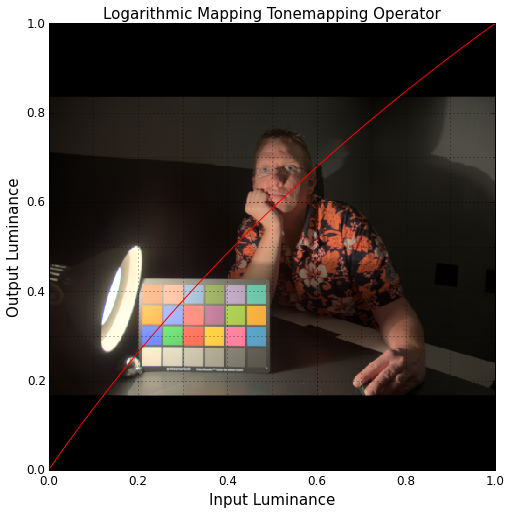

None

In [8]:
def tonemapping_operator_logarithmic_mapping_interactive(image,
                                                         p=1,
                                                         q=1):
    tonemapping_operator_image_plot(
        tonemapping_operator_logarithmic_mapping(image, p, q),
        np.squeeze(tonemapping_operator_logarithmic_mapping(D_SAMPLES, p, q)
        [..., 0]),
        title='Logarithmic Mapping Tonemapping Operator')


IPython.display.display(
    IPython.html.widgets.interactive(
        tonemapping_operator_logarithmic_mapping_interactive,
        image=IPython.html.widgets.fixed(HDRI_IMAGE),
        p=(0.1, 100, 0.01),
        q=(1, 3, 0.01)))

## Exponentiation Mapping

/Users/kelsolaar/Documents/Development/Environments/colour-hdri/lib/python2.7/site-packages/colour_hdri/tonemapping/global_operators/operators.py:422: RuntimeWarning: invalid value encountered in true_divide
  RGB = RGB * L_d[..., np.newaxis] / L[..., np.newaxis]


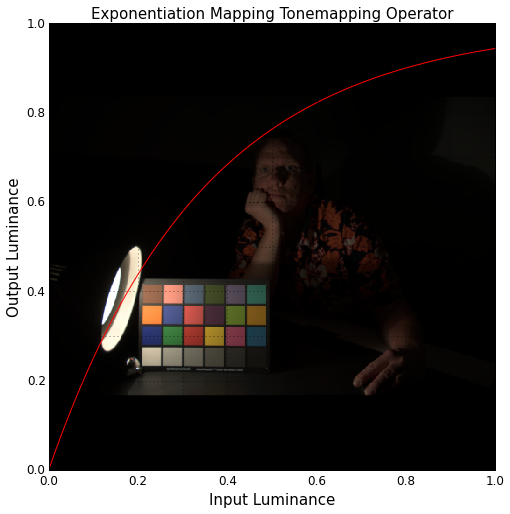

None

In [9]:
def tonemapping_operator_exponentiation_mapping_interactive(image,
                                                            p=1,
                                                            q=1):
    tonemapping_operator_image_plot(
        tonemapping_operator_exponentiation_mapping(image, p, q),
        np.squeeze(tonemapping_operator_exponential(D_SAMPLES, p, q)[..., 0]),
        title='Exponentiation Mapping Tonemapping Operator')


IPython.display.display(
    IPython.html.widgets.interactive(
        tonemapping_operator_exponentiation_mapping_interactive,
        image=IPython.html.widgets.fixed(HDRI_IMAGE),
        p=(0, 1, 0.01),
        q=(1, 3, 0.01)))

## Schlick (1994)

/Users/kelsolaar/Documents/Development/Environments/colour-hdri/lib/python2.7/site-packages/colour_hdri/tonemapping/global_operators/operators.py:471: RuntimeWarning: invalid value encountered in true_divide
  RGB = RGB * L_d[..., np.newaxis] / L[..., np.newaxis]


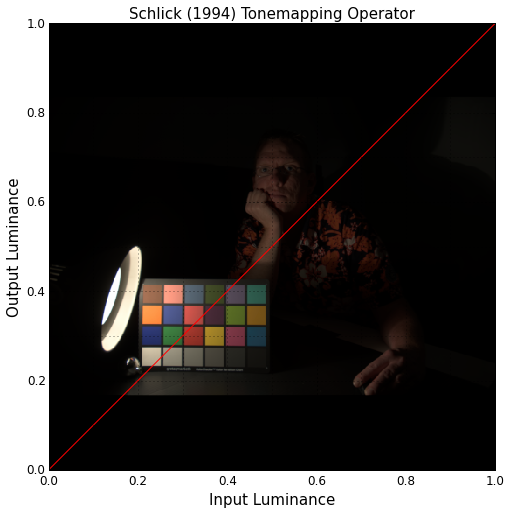

None

In [10]:
def tonemapping_operator_Schlick1994_interactive(image,
                                                 p=1):
    tonemapping_operator_image_plot(
        tonemapping_operator_Schlick1994(image, p),
        np.squeeze(tonemapping_operator_Schlick1994(D_SAMPLES,
                                                    p)[..., 0]),
        title='Schlick (1994) Tonemapping Operator')


IPython.display.display(
    IPython.html.widgets.interactive(
        tonemapping_operator_Schlick1994_interactive,
        image=IPython.html.widgets.fixed(HDRI_IMAGE),
        p=(1, 100, 0.1)))

## Tumblin (1999)

/Users/kelsolaar/Documents/Development/Environments/colour-hdri/lib/python2.7/site-packages/colour_hdri/tonemapping/global_operators/operators.py:540: RuntimeWarning: invalid value encountered in true_divide
  RGB = RGB * L_d[..., np.newaxis] / L_w[..., np.newaxis]


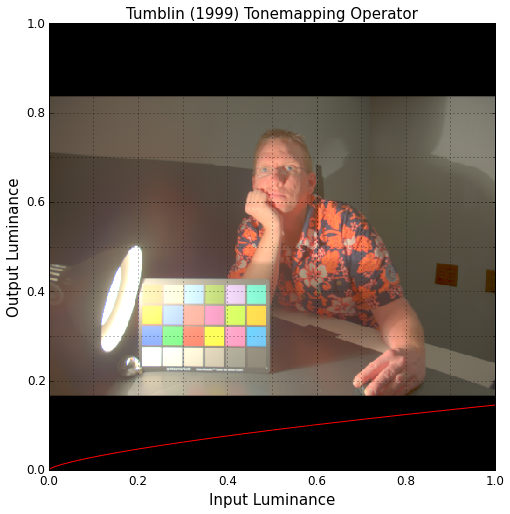

None

In [11]:
def tonemapping_operator_Tumblin1999_interactive(image,
                                                 L_da=20,
                                                 C_max=100,
                                                 L_max=100):
    tonemapping_operator_image_plot(
        tonemapping_operator_Tumblin1999(image, L_da, C_max, L_max),
        np.squeeze(tonemapping_operator_Tumblin1999(D_SAMPLES,
                                                    L_da,
                                                    C_max,
                                                    L_max)[..., 0]),
        title='Tumblin (1999) Tonemapping Operator')


IPython.display.display(
    IPython.html.widgets.interactive(
        tonemapping_operator_Tumblin1999_interactive,
        image=IPython.html.widgets.fixed(HDRI_IMAGE),
        L_da=(20, 30, 1),
        C_max=(30, 100, 1),
        L_max=(30, 100, 1)))

## Reinhard (2004)

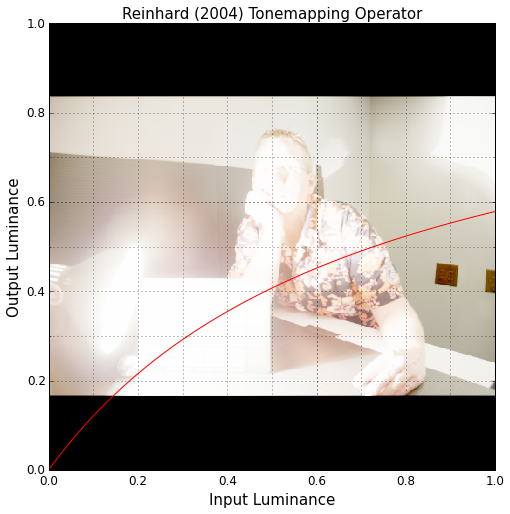

None

In [12]:
def tonemapping_operator_Reinhard2004_interactive(image,
                                                  f=0,
                                                  m=0.3,
                                                  a=0,
                                                  c=0):
    tonemapping_operator_image_plot(
        tonemapping_operator_Reinhard2004(image, f, m, a, c),
        np.squeeze(tonemapping_operator_Reinhard2004(D_SAMPLES,
                                                     f,
                                                     m,
                                                     a,
                                                     c)[..., 0]),
        title='Reinhard (2004) Tonemapping Operator')


IPython.display.display(
    IPython.html.widgets.interactive(
        tonemapping_operator_Reinhard2004_interactive,
        image=IPython.html.widgets.fixed(HDRI_IMAGE),
        f=(-20, 20, 0.1),
        m=(-1, 1, 0.01),
        a=(0, 1, 0.01),
        c=(0, 1, 0.01)))

## Filmic

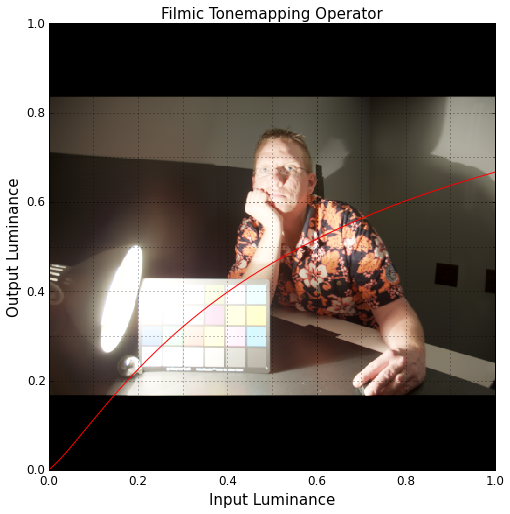

None

In [13]:
def tonemapping_operator_filmic_interactive(image,
                                            shoulder_strength=0.22,
                                            linear_strength=0.3,
                                            linear_angle=0.1,
                                            toe_strength=0.2,
                                            toe_numerator=0.01,
                                            toe_denominator=0.3,
                                            exposure_bias=2):
    args = (shoulder_strength,
            linear_strength,
            linear_angle,
            toe_strength,
            toe_numerator,
            toe_denominator,
            exposure_bias)

    tonemapping_operator_image_plot(
        tonemapping_operator_filmic(image, *args),
        np.squeeze(tonemapping_operator_filmic(D_SAMPLES, *args)[..., 0]),
        title='Filmic Tonemapping Operator')


IPython.display.display(
    IPython.html.widgets.interactive(
                tonemapping_operator_filmic_interactive,
                image=IPython.html.widgets.fixed(HDRI_IMAGE),
                shoulder_strength=(0, 1, 0.01),
                linear_strength=(0, 1, 0.01),
                linear_angle=(0, 1, 0.01),
                toe_strength=(0, 1, 0.01),
                toe_numerator=(0, 1, 0.001),
                toe_denominator=(0, 1, 0.01),
                exposure_bias=(0, 10, 0.1)))